# Output Visualisation

Visualizing output is an important part of any modelling project. MIKE IO has some possibilites for visualizing output from Dfsu and Mesh files, which we will explore here.

## Mesh

A mesh contains information about the mesh geometry.

In [ ]:
from mikeio import Mesh

msh = Mesh("data/southern_north_sea.mesh")
msh

The default is to plot the elements and color them according to the bathymetry.

In [ ]:
msh.plot()

In [ ]:
msh.plot(plot_type='outline_only');

In [ ]:
msh.plot(plot_type='mesh_only');

Maybe we would like to higlight the bathymetric variations in some range, in this case in the -40, -20m range.

In [ ]:
msh.plot(plot_type='patch', show_mesh=False, vmin=-40, vmax=-20);

There are other options as well, such as explicit specification of which contour lines to show or choosing a specific colormap ([matplotlib colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html))

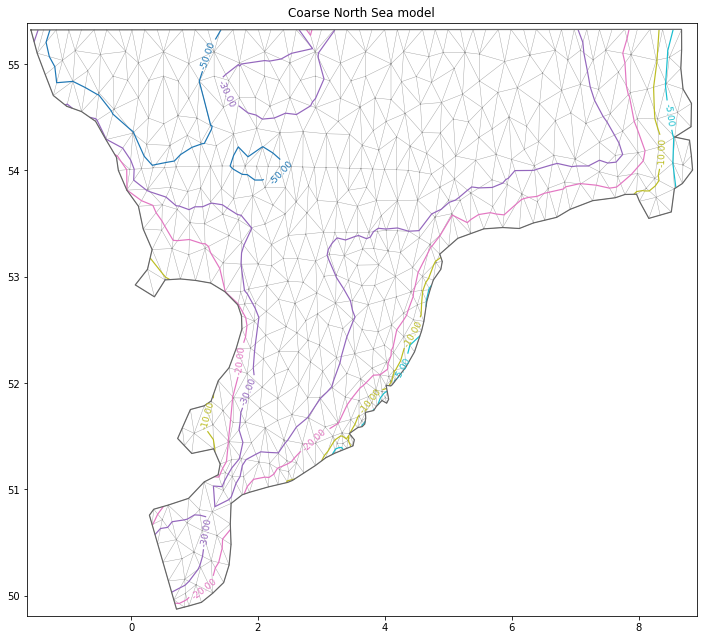

In [67]:
msh.plot(plot_type='contour', show_mesh=True, 
         levels=[-50,-30,-20,-10,-5], cmap="tab10",
         figsize=(12,12), title="Coarse North Sea model");

## Dfsu

In [ ]:
from mikeio import Dfsu
dfs = Dfsu("data/oresundHD_run1.dfsu")
dfs

The default plot for a Dfsu is the same as for the mesh. (plot the elements and color them according to the bathymetry).

But in addition, we can also plot other data, such as surface elevation.

In [ ]:
dfs.plot()

In [ ]:
ds = dfs.read()
ds

In [ ]:
# extract wl at last timestep
values = ds["Surface elevation"][-1]
values.shape

In [ ]:
time_of_last_step = ds.time[-1]
time_of_last_step


In order to customize the plot we can take return the axis and add additional things, like markers and a legend.

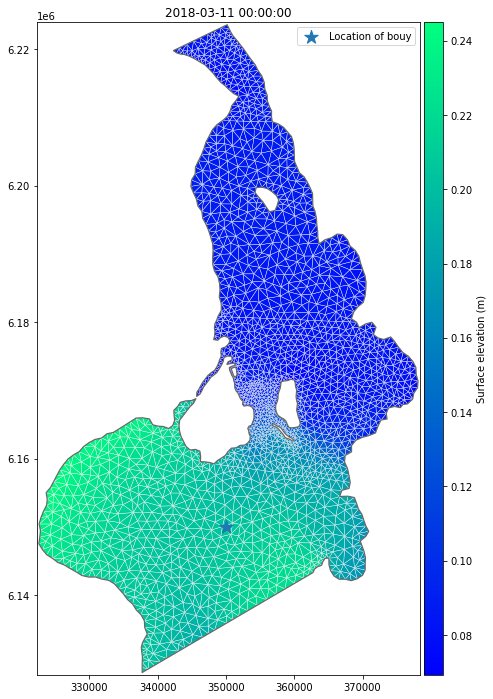

In [78]:
import matplotlib.pyplot as plt
``
ax = dfs.plot(z = values, label="Surface elevation (m)",
              cmap="winter",
              title=time_of_last_step, figsize=(12,12));
ax.scatter(x=350000, y=6.15e6, marker='*', s=200, label="Location of bouy")
ax.legend()

In [86]:
ds

<mikeio.Dataset>
Dimensions: (5, 3612)
Time: 2018-03-07 00:00:00 - 2018-03-11 00:00:00
Items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Total water depth <Water Depth> (meter)
  2:  U velocity <u velocity component> (meter per sec)
  3:  V velocity <v velocity component> (meter per sec)

In order to create subplots, we can supply the axis as an argument to plot.

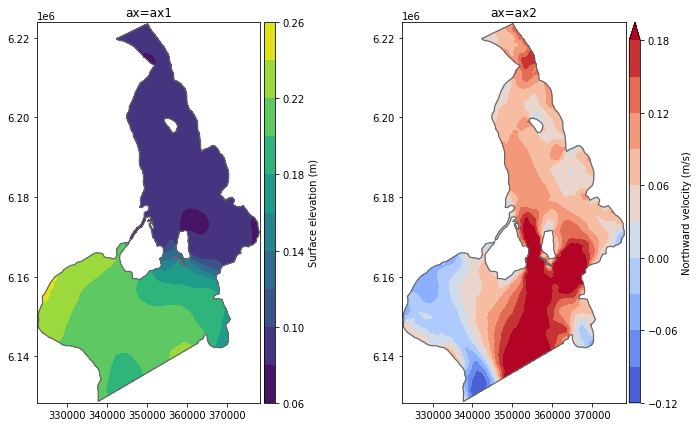

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,7))

dfs.plot(z = ds["Surface elevation"][-1], ax=ax1, 
         label="Surface elevation (m)", title="ax=ax1", plot_type='contourf', show_mesh=False);

dfs.plot(z = ds["V velocity"][-1], ax=ax2, cmap="coolwarm", vmin=-0.2, vmax=0.2,
         label="Northward velocity (m/s)", title="ax=ax2", plot_type='contourf', show_mesh=False);
